```
Topic:        Challenge Set 1
Subject:      Explore MTA turnstile data
Date:         07/06/2020
Name:         David Weon
Worked with:  Adam Rauckhorst, Dyllan Usher
```

### Challenge 1

In [1]:
import pandas as pd
df1 = pd.read_csv('turnstile_200606.txt')
df2 = pd.read_csv('turnstile_200613.txt')
df3 = pd.concat([df1,df2])
df3

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,00:00:00,REGULAR,7419887,2520505
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,04:00:00,REGULAR,7419888,2520505
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,08:00:00,REGULAR,7419895,2520514
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,12:00:00,REGULAR,7419911,2520531
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,16:00:00,REGULAR,7419940,2520553
...,...,...,...,...,...,...,...,...,...,...,...
206657,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/12/2020,05:00:00,REGULAR,5554,514
206658,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/12/2020,09:00:00,REGULAR,5554,514
206659,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/12/2020,13:00:00,REGULAR,5554,514
206660,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/12/2020,17:00:00,REGULAR,5554,514


In [2]:
df3.reset_index(inplace=True)

### Challenge 2

In [3]:
type(df3['DATE'])

pandas.core.series.Series

In [4]:
type(df3['TIME'])

pandas.core.series.Series

In [5]:
pd.to_datetime(df3['DATE'] + ' ' + df3['TIME'])

0        2020-05-30 00:00:00
1        2020-05-30 04:00:00
2        2020-05-30 08:00:00
3        2020-05-30 12:00:00
4        2020-05-30 16:00:00
                 ...        
414549   2020-06-12 05:00:00
414550   2020-06-12 09:00:00
414551   2020-06-12 13:00:00
414552   2020-06-12 17:00:00
414553   2020-06-12 21:00:00
Length: 414554, dtype: datetime64[ns]

In [6]:
df3['DATETIME'] = pd.to_datetime(df3['DATE'] + ' ' + df3['TIME'])
df3

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
0,0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,00:00:00,REGULAR,7419887,2520505,2020-05-30 00:00:00
1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,04:00:00,REGULAR,7419888,2520505,2020-05-30 04:00:00
2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,08:00:00,REGULAR,7419895,2520514,2020-05-30 08:00:00
3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,12:00:00,REGULAR,7419911,2520531,2020-05-30 12:00:00
4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,16:00:00,REGULAR,7419940,2520553,2020-05-30 16:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
414549,206657,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/12/2020,05:00:00,REGULAR,5554,514,2020-06-12 05:00:00
414550,206658,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/12/2020,09:00:00,REGULAR,5554,514,2020-06-12 09:00:00
414551,206659,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/12/2020,13:00:00,REGULAR,5554,514,2020-06-12 13:00:00
414552,206660,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/12/2020,17:00:00,REGULAR,5554,514,2020-06-12 17:00:00


### Challenge 3

In [7]:
turnstile_count = df3.groupby(['C/A','UNIT','SCP','STATION','DATE']).ENTRIES
min_count = turnstile_count.min()
min_count.rename('MIN', inplace=True)
max_count = turnstile_count.max()
max_count.rename('MAX', inplace=True)

C/A    UNIT  SCP       STATION        DATE      
A002   R051  02-00-00  59 ST          05/30/2020    7419977
                                      05/31/2020    7420073
                                      06/01/2020    7420235
                                      06/02/2020    7420410
                                      06/03/2020    7420573
                                                     ...   
TRAM2  R469  00-05-01  RIT-ROOSEVELT  06/08/2020       5554
                                      06/09/2020       5554
                                      06/10/2020       5554
                                      06/11/2020       5554
                                      06/12/2020       5554
Name: MAX, Length: 69090, dtype: int64

In [8]:
max_min = pd.concat([max_count,min_count], axis=1)

In [9]:
max_min['NET_ENTRIES'] = max_count - min_count

In [11]:
max_min.reset_index(inplace=True)
max_min

,C/A,UNIT,SCP,STATION,DATE,MAX,MIN,NET_ENTRIES
0,A002,R051,02-00-00,59 ST,05/30/2020,7419977,7419887,90
1,A002,R051,02-00-00,59 ST,05/31/2020,7420073,7420000,73
2,A002,R051,02-00-00,59 ST,06/01/2020,7420235,7420099,136
3,A002,R051,02-00-00,59 ST,06/02/2020,7420410,7420257,153
4,A002,R051,02-00-00,59 ST,06/03/2020,7420573,7420420,153
...,...,...,...,...,...,...,...,...
69085,TRAM2,R469,00-05-01,RIT-ROOSEVELT,06/08/2020,5554,5554,0
69086,TRAM2,R469,00-05-01,RIT-ROOSEVELT,06/09/2020,5554,5554,0
69087,TRAM2,R469,00-05-01,RIT-ROOSEVELT,06/10/2020,5554,5554,0
69088,TRAM2,R469,00-05-01,RIT-ROOSEVELT,06/11/2020,5554,5554,0


## Challenge 4

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

In [13]:
#selecting one turnstile
filt = (max_min['C/A']=='A002')&(max_min['UNIT']=='R051')&(max_min['SCP']=='02-00-00')&(max_min['STATION']=='59 ST')

In [14]:
max_min[filt]

,C/A,UNIT,SCP,STATION,DATE,MAX,MIN,NET_ENTRIES
0,A002,R051,02-00-00,59 ST,05/30/2020,7419977,7419887,90
1,A002,R051,02-00-00,59 ST,05/31/2020,7420073,7420000,73
2,A002,R051,02-00-00,59 ST,06/01/2020,7420235,7420099,136
3,A002,R051,02-00-00,59 ST,06/02/2020,7420410,7420257,153
4,A002,R051,02-00-00,59 ST,06/03/2020,7420573,7420420,153
5,A002,R051,02-00-00,59 ST,06/04/2020,7420736,7420584,152
6,A002,R051,02-00-00,59 ST,06/05/2020,7420901,7420744,157
7,A002,R051,02-00-00,59 ST,06/06/2020,7421007,7420920,87
8,A002,R051,02-00-00,59 ST,06/07/2020,7421094,7421025,69
9,A002,R051,02-00-00,59 ST,06/08/2020,7421360,7421148,212


Text(0, 0.5, 'Daily Entries')

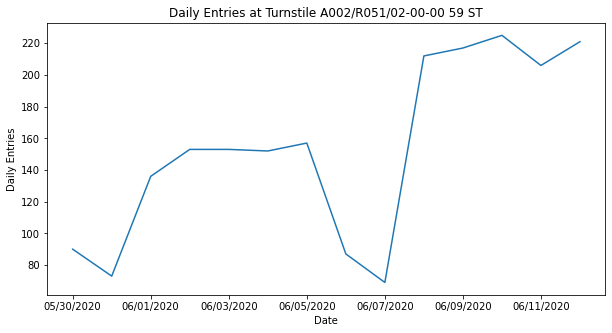

In [15]:
max_min[filt].plot(x='DATE', y='NET_ENTRIES',kind='line',figsize=(10,5),legend=False, title='Daily Entries at Turnstile A002/R051/02-00-00 59 ST')
plt.xlabel('Date')
plt.ylabel('Daily Entries')

### Challenge 5

In [16]:
max_min.groupby(['C/A','UNIT','STATION','DATE']).NET_ENTRIES.sum()

C/A    UNIT  STATION        DATE      
A002   R051  59 ST          05/30/2020     776
                            05/31/2020     572
                            06/01/2020    1298
                            06/02/2020    1530
                            06/03/2020    1386
                                          ... 
TRAM2  R469  RIT-ROOSEVELT  06/08/2020     894
                            06/09/2020     911
                            06/10/2020     914
                            06/11/2020     774
                            06/12/2020     978
Name: NET_ENTRIES, Length: 10477, dtype: int64

### Challenge 6

In [17]:
max_min.groupby(['STATION','DATE']).NET_ENTRIES.sum()

STATION    DATE      
1 AV       05/30/2020    1053
           05/31/2020     864
           06/01/2020    2002
           06/02/2020    2190
           06/03/2020    2134
                         ... 
ZEREGA AV  06/08/2020     583
           06/09/2020     530
           06/10/2020     525
           06/11/2020     522
           06/12/2020     565
Name: NET_ENTRIES, Length: 5303, dtype: int64

### Challenge 7

In [18]:
stations = max_min.groupby(['STATION','DATE']).NET_ENTRIES.sum().reset_index()

In [19]:
filt2 = (stations['STATION'] == '1 AV')

Text(0, 0.5, 'Daily Entries')

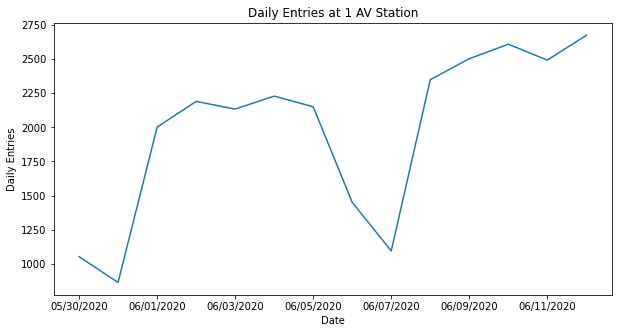

In [20]:
stations[filt2].plot(x='DATE', y='NET_ENTRIES',kind='line',figsize=(10,5),legend=False, title='Daily Entries at 1 AV Station')
plt.xlabel('Date')
plt.ylabel('Daily Entries')

### Challenge 8

In [21]:
stations['DATE'] = pd.to_datetime(stations['DATE'])

In [22]:
stations['DAY'] = stations['DATE'].dt.dayofweek

In [23]:
first_av = stations[filt2]

In [24]:
week1_start = '2020-05-30'
week1_end = '2020-06-05'
week1 = (first_av['DATE']>=week1_start) & (first_av['DATE']<=week1_end)
week1_df = first_av.loc[week1]

In [25]:
week1_count_list = []
for elem in week1_df['NET_ENTRIES']:
    week1_count_list.append(elem)

week1_count_list

[1053, 864, 2002, 2190, 2134, 2229, 2151]

In [26]:
week2_start = '2020-06-06'
week2_end = '2020-06-12'
week2 = (first_av['DATE']>=week2_start) & (first_av['DATE']<=week2_end)
week2_df = first_av.loc[week2]

In [27]:
week2_count_list = []
for elem in week2_df['NET_ENTRIES']:
    week2_count_list.append(elem)

week2_count_list

[1451, 1095, 2349, 2503, 2609, 2493, 2674]

<Figure size 720x360 with 0 Axes>

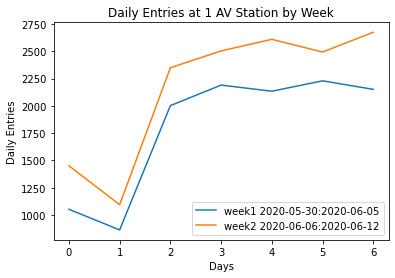

<Figure size 720x360 with 0 Axes>

In [28]:
plt.plot(week1_count_list, label='week1 2020-05-30:2020-06-05')
plt.plot(week2_count_list, label='week2 2020-06-06:2020-06-12')
plt.xlabel('Days')
plt.ylabel('Daily Entries')
plt.title('Daily Entries at 1 AV Station by Week')
plt.legend(loc='lower right')
plt.figure(figsize=(10,5))

### Challenge 9